## BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

In [ ]:
Dataset Attributes
Here is the description of all the variables:
Variable: Definition
ID: Unique client ID
age: Age of the client
job: Type of job
marital: Marital status of the client
education: Education level
default: Credit in default.
housing: Housing loan
loan: Personal loan
contact: Type of communication
month: Contact month
day_of_week: Day of week of contact
duration: Contact duration
campaign: number of contacts performed during this campaign to the client
pdays: number of days that passed by after the client was last contacted
previous: number of contacts performed before this campaign
poutcome: outcome of the previous marketing campaign

Output variable (desired target):

Subscribed (target): has the client subscribed a term deposit? (YES/NO)

Dataset Link-

https://github.com/dsrscientist/dataset5
https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score, auc

from sklearn.model_selection import cross_val_score

In [156]:
Bank_df_train = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
Bank_df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


Observation:
            1. Label (i.e. subscribed) contains classification data so this is a Classification 
               Problem.
            2. 'subscribed' is Binary Classification Problem (yes/no)

## Exploratory Data Analysis

In [157]:
Bank_df_train.shape  # 18 columns

(31647, 18)

In [158]:
Bank_df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [159]:
Bank_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


## Drop Column not needed

In [160]:
# 'ID' column not needed for prediction of "subscribed'

Bank_df_train.drop(["ID"], axis = 1, inplace = True)
Bank_df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [161]:
Bank_df_train.shape  # 17 columns

(31647, 17)

In [162]:
Bank_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [163]:
Bank_df_train.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Observation:
            1. No Null values

## check for any blank records

In [164]:
Bank_df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [165]:
Bank_df_train.loc[Bank_df_train['poutcome'] == ' '] 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


In [ ]:
Observation:
            1. No records are blank

## check the duplicate values in rows

In [166]:
Bank_df_train.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [167]:
Bank_df_train.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [168]:
Bank_df_train.shape

(31647, 17)

In [169]:
Bank_df_train.duplicated().sum()

0

Observation:
            1. No duplicate values in rows.

In [170]:
Bank_df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


## Number of uniques values in each column 

In [171]:
Bank_df_train.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3
day,31


In [172]:
Bank_df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observations:
            1. No missing values
            2. Mean value is > median value so might be right skew and postively correlated
            3. Looks like there are outliers

In [173]:
Bank_df_train.shape

(31647, 17)

## Data Visualization

In [174]:
Bank_df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


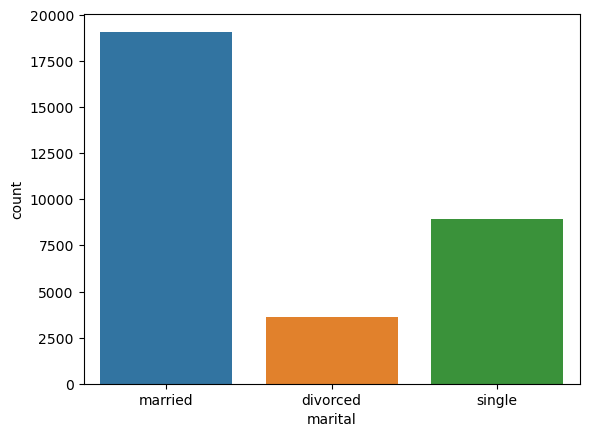

In [175]:
# Univariate Analysis

sns.countplot(x = 'marital', data = Bank_df_train)
print(Bank_df_train['marital'].value_counts())

Observations:
            1. more number of married customers are there

In [176]:
Bank_df_train.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
month           12
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


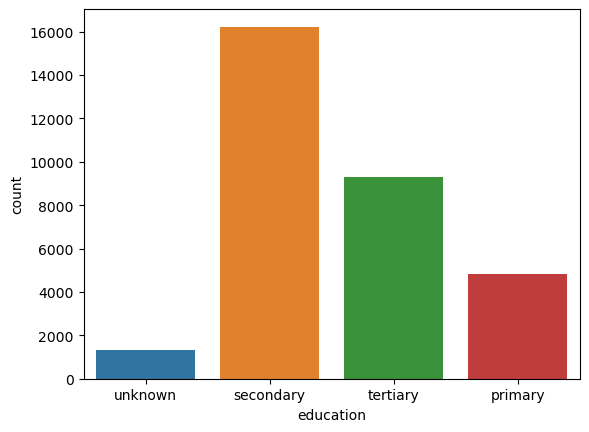

In [177]:
# Univariate Analysis

sns.countplot(x = 'education', data = Bank_df_train)
print(Bank_df_train['education'].value_counts())

Observations:
            1. more number of Secondary education customers are there

no     31062
yes      585
Name: default, dtype: int64


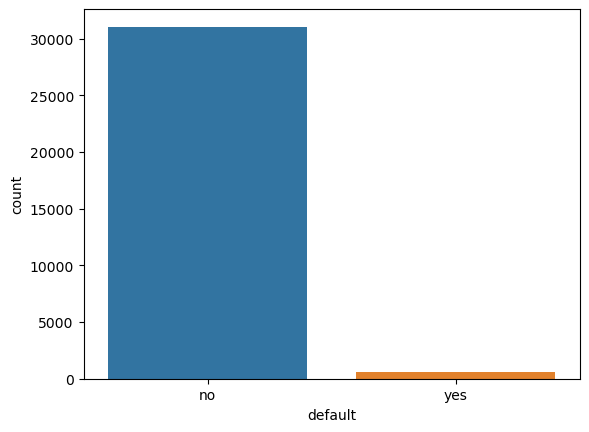

In [178]:
# Univariate Analysis

sns.countplot(x = 'default', data = Bank_df_train)
print(Bank_df_train['default'].value_counts())

Observations:
            1. more number of non-defaulters

yes    17584
no     14063
Name: housing, dtype: int64


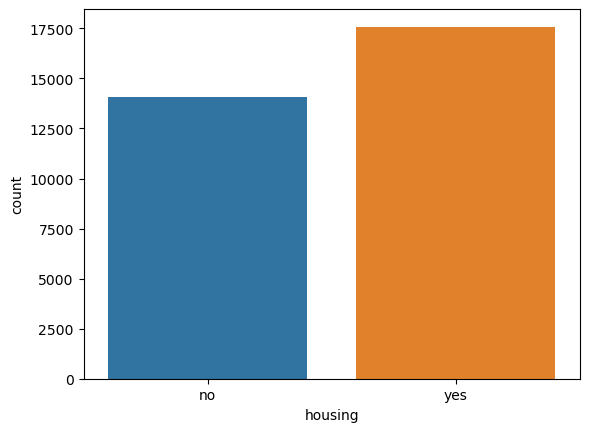

In [179]:
# Univariate Analysis

sns.countplot(x = 'housing', data = Bank_df_train)
print(Bank_df_train['housing'].value_counts())

Observations:
            1. more number of customers taken housing loan

no     26516
yes     5131
Name: loan, dtype: int64


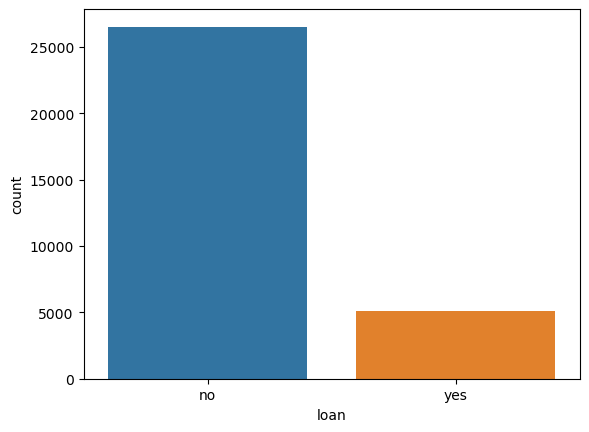

In [180]:
# Univariate Analysis

sns.countplot(x = 'loan', data = Bank_df_train)
print(Bank_df_train['loan'].value_counts())

Observations:
            1. more number of customers not taken personal loan

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


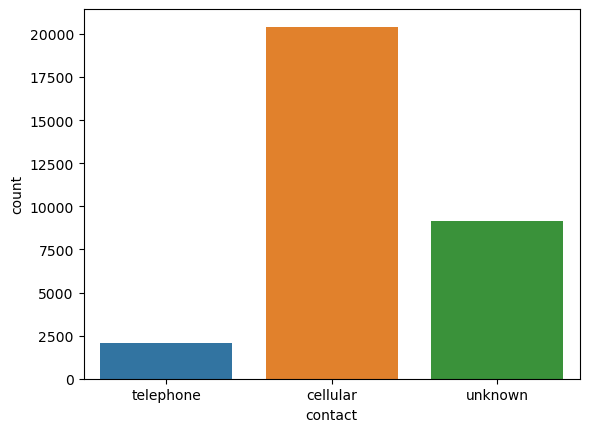

In [181]:
# Univariate Analysis

sns.countplot(x = 'contact', data = Bank_df_train)
print(Bank_df_train['contact'].value_counts())

Observations:
            1. more number of customers contacts are cellular

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


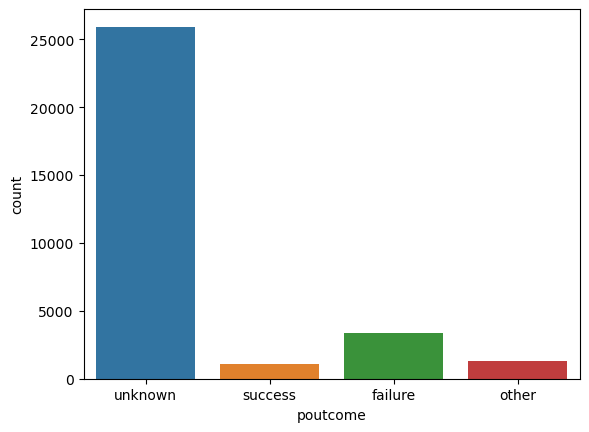

In [182]:
# Univariate Analysis

sns.countplot(x = 'poutcome', data = Bank_df_train)
print(Bank_df_train['poutcome'].value_counts())

Observations:
            1. more number of customers outcome of the previous marketing campaign are not known.

no     27932
yes     3715
Name: subscribed, dtype: int64


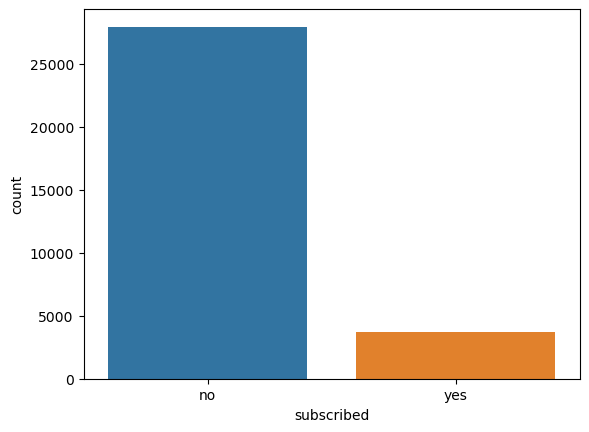

In [183]:
# Univariate Analysis

sns.countplot(x = 'subscribed', data = Bank_df_train)
print(Bank_df_train['subscribed'].value_counts())

Observations:
            1. more number of customers have not subscribed the term-deposit.
            2. output label - Binary classification problem
            3. Data is imbalanced

<AxesSubplot:xlabel='age', ylabel='Count'>

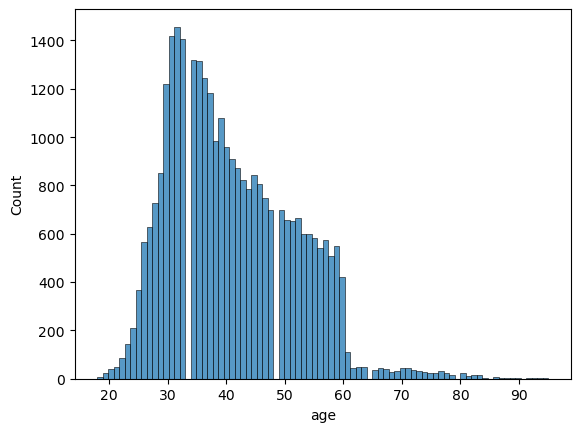

In [184]:
sns.histplot(Bank_df_train['age'])

Observations:
            1. more number of customers are of age group 31 and 32

In [185]:
print(Bank_df_train['job'].value_counts())

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


Observations:
            1. more number of customers are of job - 'blue-collar' and 'management'       

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


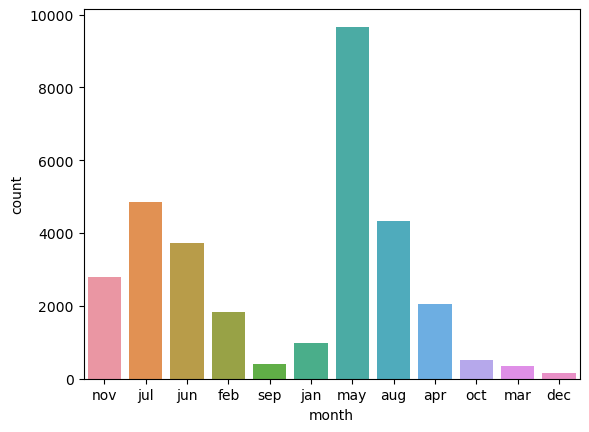

In [186]:
# Univariate Analysis

sns.countplot(x = 'month', data = Bank_df_train)
print(Bank_df_train['month'].value_counts())

Observations:
            1. more number of customers are contacted in the month of 'May'       

## Feature Encoding

In [187]:
# Convert Object data type to int type

Bank_df_train.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [188]:
# seperating numerical and categorical columns

cat_col = []
for i in Bank_df_train.dtypes.index:
    if Bank_df_train.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in Bank_df_train.dtypes.index:
    if Bank_df_train.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical Column ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [189]:
Bank_df_train['subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [190]:
# Ordinal Encoding

# ML model does not understand 'yes' or 'no' so replace with 0 and 1

Bank_df_train['subscribed'] = Bank_df_train['subscribed'].replace({'yes' : 1, 'no' : 0})

In [191]:
Bank_df_train['subscribed'].unique()

array([0, 1], dtype=int64)

0    27932
1     3715
Name: subscribed, dtype: int64


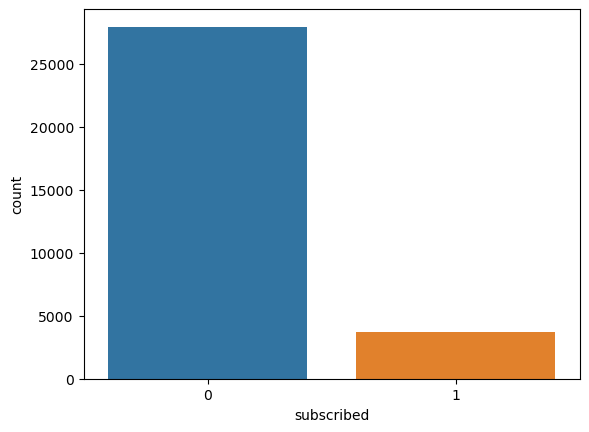

In [192]:
# Univariate Analysis

sns.countplot(x = 'subscribed', data = Bank_df_train)
print(Bank_df_train['subscribed'].value_counts())

Observations:
            1. Data is imbalanced. We need to do oversampling method.
            2. More number of customers have not subscribed the term-deposit.

In [193]:
Bank_df_train.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed     int64
dtype: object

In [194]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [195]:
for i in cat_col[:9]:
    Bank_df_train[i] = label_enc.fit_transform(Bank_df_train[i])

In [196]:
Bank_df_train.dtypes

age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int64
dtype: object

In [197]:
Bank_df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


<AxesSubplot:xlabel='marital', ylabel='subscribed'>

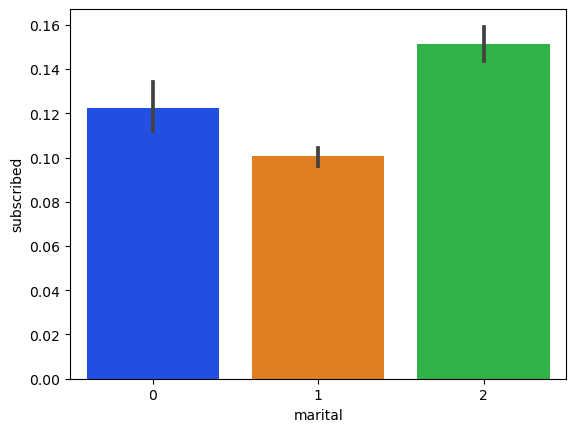

In [198]:
# plot marital v/s subscribed

sns.barplot(x = 'marital', y = 'subscribed', data = Bank_df_train, palette = 'bright')

<AxesSubplot:xlabel='job', ylabel='subscribed'>

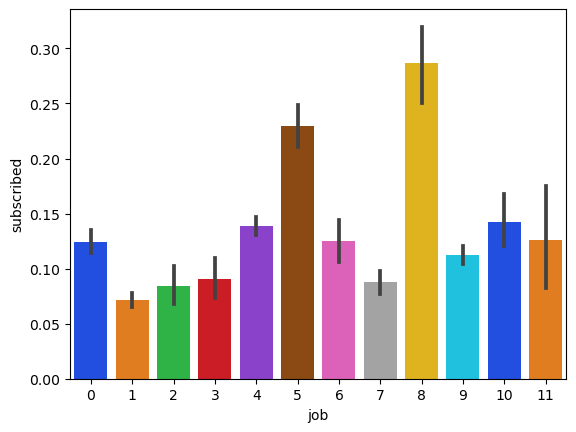

In [199]:
# plot job v/s subscribed

sns.barplot(x = 'job', y = 'subscribed', data = Bank_df_train, palette = 'bright')

<AxesSubplot:xlabel='education', ylabel='subscribed'>

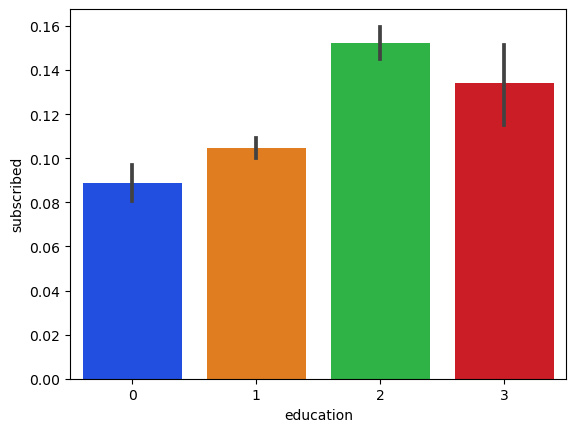

In [200]:
# plot education v/s subscribed

sns.barplot(x = 'education', y = 'subscribed', data = Bank_df_train, palette = 'bright')

<AxesSubplot:xlabel='default', ylabel='subscribed'>

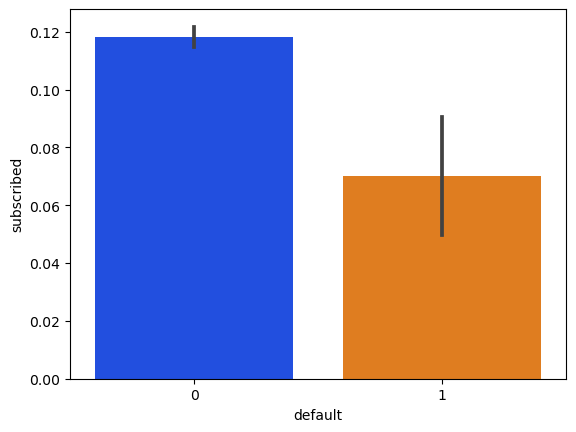

In [201]:
# plot default v/s subscribed

sns.barplot(x = 'default', y = 'subscribed', data = Bank_df_train, palette = 'bright')

<AxesSubplot:xlabel='housing', ylabel='subscribed'>

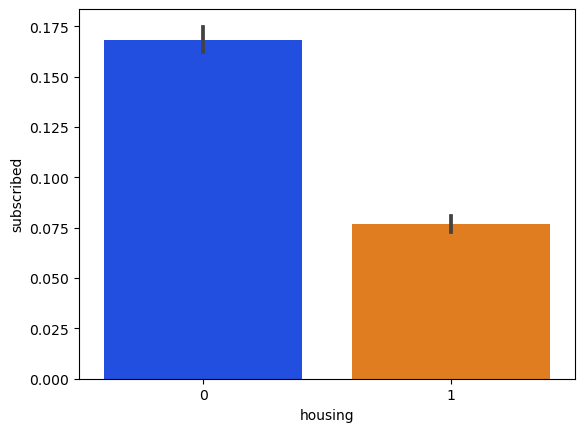

In [202]:
# plot housing v/s subscribed

sns.barplot(x = 'housing', y = 'subscribed', data = Bank_df_train, palette = 'bright')

<AxesSubplot:xlabel='loan', ylabel='subscribed'>

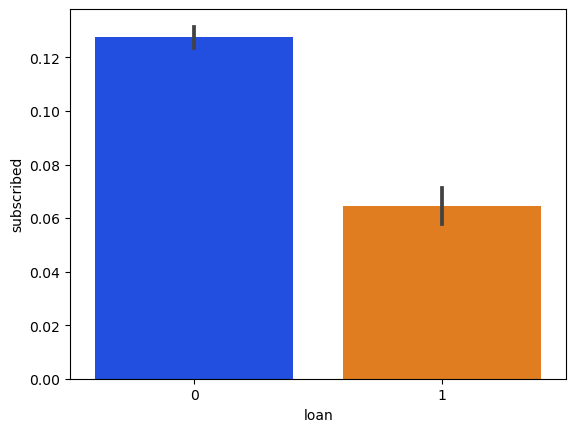

In [203]:
# plot loan v/s subscribed

sns.barplot(x = 'loan', y = 'subscribed', data = Bank_df_train, palette = 'bright')

<AxesSubplot:xlabel='contact', ylabel='subscribed'>

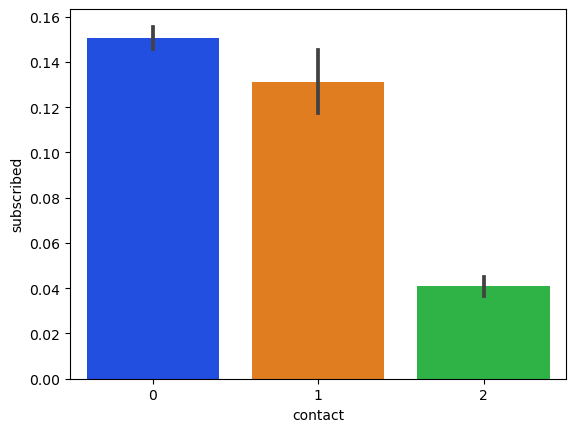

In [204]:
# plot contact v/s subscribed

sns.barplot(x = 'contact', y = 'subscribed', data = Bank_df_train, palette = 'bright')

<AxesSubplot:xlabel='month', ylabel='subscribed'>

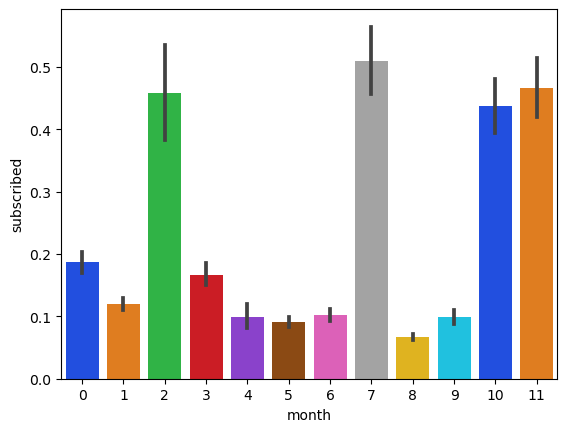

In [205]:
# plot month v/s subscribed

sns.barplot(x = 'month', y = 'subscribed', data = Bank_df_train, palette = 'bright')

<AxesSubplot:xlabel='poutcome', ylabel='subscribed'>

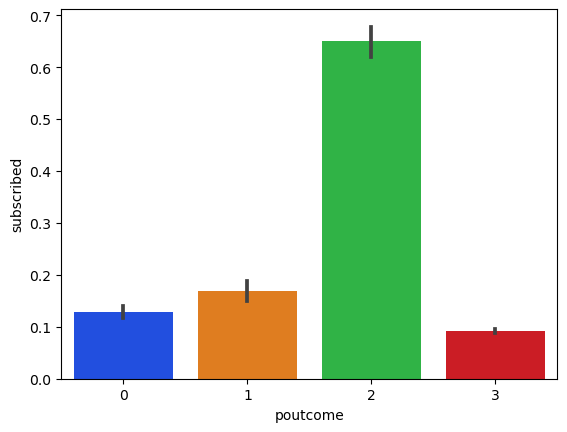

In [206]:
# plot poutcome v/s subscribed

sns.barplot(x = 'poutcome', y = 'subscribed', data = Bank_df_train, palette = 'bright')

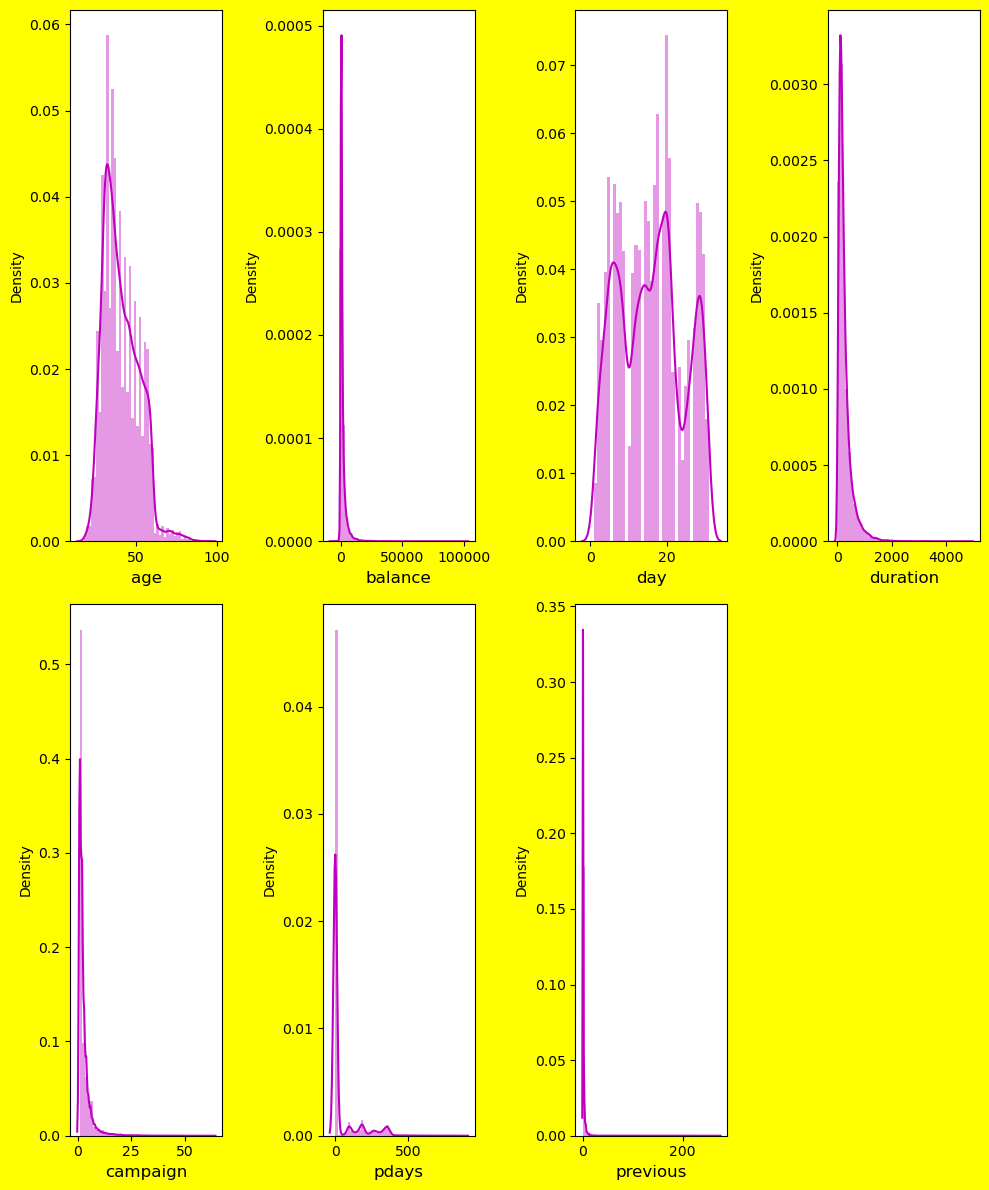

In [207]:
# lets see how numeric data is distributed for every column

plt.figure(figsize=(10,12), facecolor = 'yellow')
p = 1
for i in num_col:
    if p <= 7:
        ax = plt.subplot(2, 4, p)
        sns.distplot(Bank_df_train[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
        1. There are lot of outliers - Looks like we should also deal with outliers
        2. We need to deal with skewness in the data - most of the variables right skewness are there 

In [208]:
Bank_df_train.shape

(31647, 17)

## Check for Multicollinearity

# Data Correlation find - whether we need all 17 columns

In [209]:
# get coefficient of one variable with all the other variables

cor = Bank_df_train.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


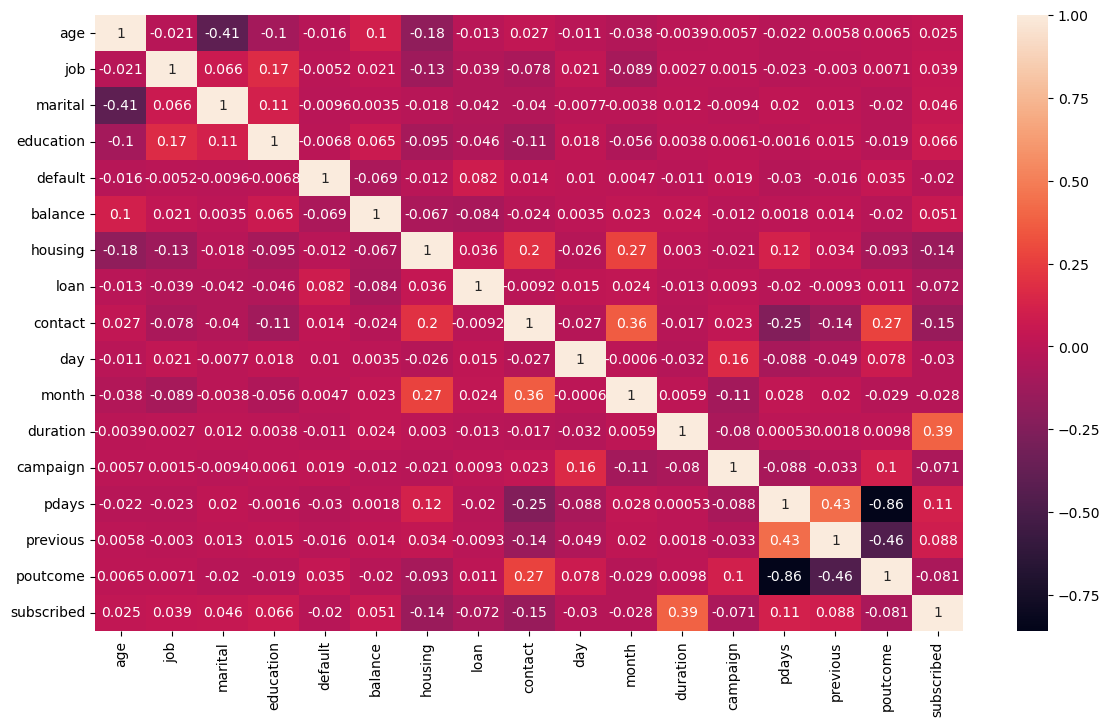

In [210]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

In [211]:
# correlation of all features with the target column - 'Survived'

cor['subscribed'].sort_values(ascending = False)  

subscribed    1.000000
duration      0.389838
pdays         0.108290
previous      0.088081
education     0.066051
balance       0.050807
marital       0.046043
job           0.038921
age           0.024538
default      -0.020168
month        -0.028088
day          -0.029600
campaign     -0.070607
loan         -0.072266
poutcome     -0.080895
housing      -0.141092
contact      -0.150051
Name: subscribed, dtype: float64

## Checking Outliers

In [212]:
# we dont check outliers for labels - so remove the label

Bank_df_train_features = Bank_df_train.drop(['subscribed'], axis = 1)

In [213]:
Bank_df_train_features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0


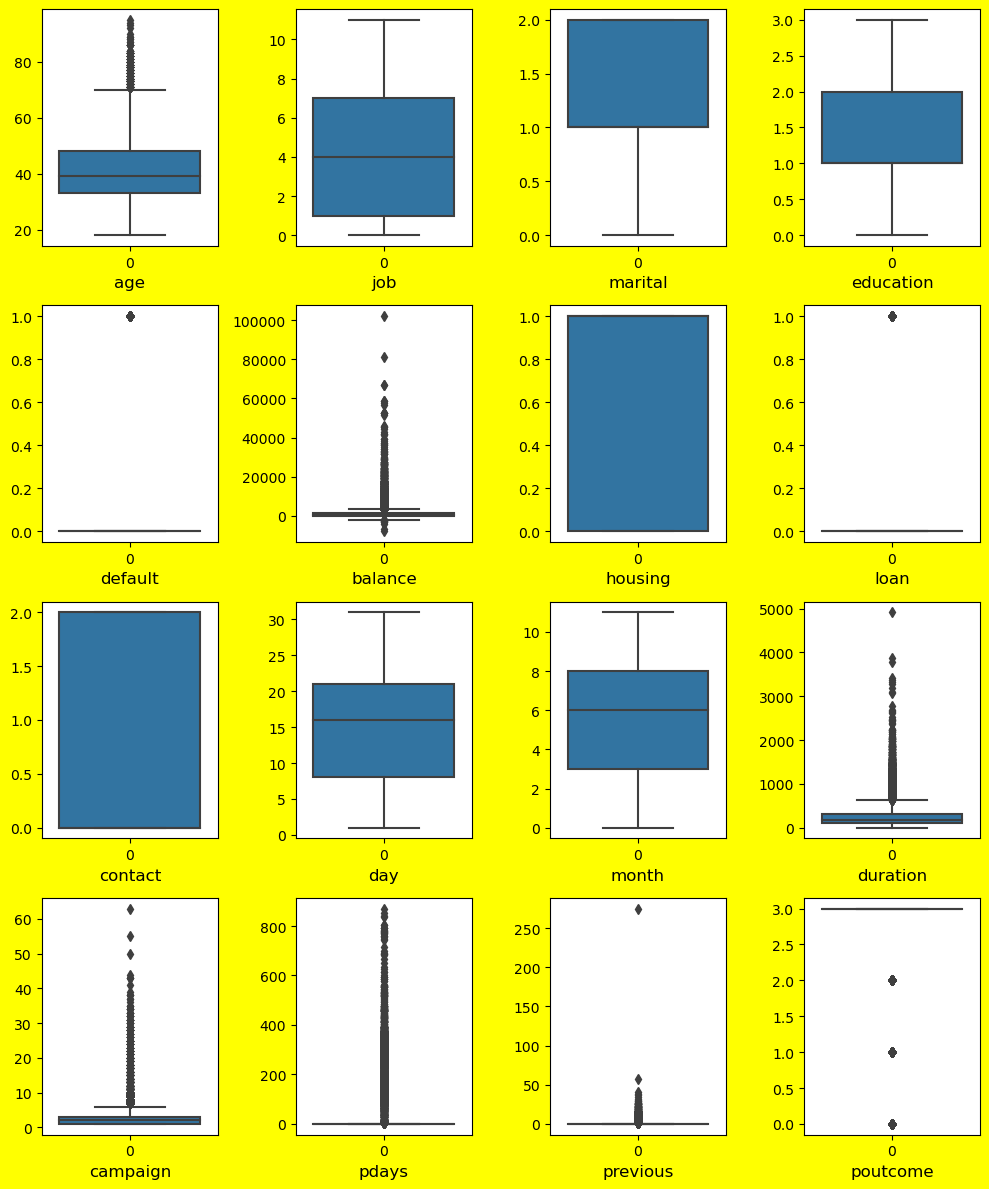

In [214]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,12), facecolor = 'yellow')
p = 1
for i in Bank_df_train_features:
    if p <= 16:
        ax = plt.subplot(4, 4, p)
        sns.boxplot(data = Bank_df_train_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations:
            1. More Outliers found in features - 'age', 'balance', 'duration', 'campaign', 'pdays', 
               'previous'. Most of this outliers are right skewed (i.e. outliers are above max value) 
            2. Remove the outliers

In [215]:
Bank_df_train_features.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

## Find IQR to identify outliers and remove it

In [216]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = Bank_df_train.quantile(0.25)
q3 = Bank_df_train.quantile(0.75)
iqr = q3 - q1

In [217]:
# validating one outlier

age_high = (q3['age'] + (1.5 * iqr['age']))
age_high

# anything > 70.5 outliers

70.5

In [218]:
# check the index which have the higher values

np_index = np.where(Bank_df_train['age'] > age_high)
np_index

# remove these indexes as they are outliers

(array([  717,   765,   823,   920,   986,  1121,  1212,  1239,  1475,
         1498,  1513,  1601,  1612,  1624,  1660,  1684,  1731,  1925,
         1938,  2101,  2134,  2189,  2285,  2302,  2437,  2485,  2509,
         2585,  2640,  2646,  2688,  2974,  3179,  3182,  3267,  3269,
         3422,  3506,  3527,  3546,  3627,  3785,  3935,  3976,  4091,
         4254,  4270,  4476,  4527,  4604,  4747,  4853,  5012,  5169,
         5414,  5448,  5610,  5728,  5827,  5874,  5945,  5946,  5996,
         6252,  6265,  6390,  6412,  6468,  6491,  6552,  6641,  6799,
         6824,  6917,  7019,  7022,  7055,  7114,  7242,  7357,  7401,
         7493,  7539,  7565,  7865,  7879,  8269,  8289,  8323,  8443,
         8478,  8536,  8584,  8789,  8808,  8828,  9150,  9173,  9384,
         9413,  9521,  9537,  9606,  9616,  9843,  9912, 10074, 10173,
        10207, 10223, 10296, 10319, 10321, 10578, 10656, 10683, 10737,
        10840, 10888, 10941, 10972, 11052, 11058, 11110, 11176, 11218,
      

In [219]:
Bank_df_train.shape

(31647, 17)

In [220]:
Bank_df_train = Bank_df_train.drop(Bank_df_train.index[np_index])

In [221]:
Bank_df_train.shape  # 349 rows removed - outliers

(31298, 17)

In [222]:
Bank_df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [223]:
Bank_df_train.reset_index(inplace = True, drop = True)

In [224]:
Bank_df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31293,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31294,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31295,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31296,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [225]:
# validating another outlier

campaign_high = (q3['campaign'] + (1.5 * iqr['campaign']))
campaign_high

# anything > 6 outliers

6.0

In [226]:
# check the index which have the higher values

np_index1 = np.where(Bank_df_train['campaign'] > campaign_high)
np_index1

# remove these indexes as they are outliers

(array([   10,    17,    21, ..., 31259, 31281, 31296], dtype=int64),)

In [227]:
Bank_df_train.shape

(31298, 17)

In [228]:
Bank_df_train = Bank_df_train.drop(Bank_df_train.index[np_index1])

In [229]:
Bank_df_train.shape  # 2115 rows removed - outliers

(29183, 17)

In [230]:
Bank_df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31292,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31293,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31294,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31295,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0


In [231]:
Bank_df_train.reset_index(inplace = True, drop = True)

In [232]:
Bank_df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29178,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
29179,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
29180,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
29181,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0


In [233]:
# validating another outlier

duration_high = (q3['duration'] + (1.5 * iqr['duration']))
duration_high

# anything > 640.25 outliers

640.25

In [234]:
# check the index which have the higher values

np_index2 = np.where(Bank_df_train['duration'] > duration_high)
np_index2

# remove these indexes as they are outliers

(array([    3,     8,     9, ..., 29155, 29175, 29182], dtype=int64),)

In [235]:
Bank_df_train.shape

(29183, 17)

In [236]:
Bank_df_train = Bank_df_train.drop(Bank_df_train.index[np_index2])

In [237]:
Bank_df_train.shape  # 349 rows removed - outliers

(27058, 17)

In [238]:
Bank_df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
5,33,4,2,2,0,0,1,0,0,2,3,116,3,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
29178,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
29179,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
29180,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1


In [239]:
Bank_df_train.reset_index(inplace = True, drop = True)

In [240]:
Bank_df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
4,33,4,2,2,0,0,1,0,0,2,3,116,3,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
27054,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
27055,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
27056,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1


## Checking for Skewness

In [241]:
Bank_df_train.skew() # not in the range -0.5 to +0.5

age            0.415820
job            0.265306
marital       -0.106366
education      0.201433
default        7.243680
balance        8.075190
housing       -0.257727
loan           1.810064
contact        0.761946
day            0.120303
month         -0.528176
duration       1.012968
campaign       1.236600
pdays          2.578605
previous      51.308301
poutcome      -1.912470
subscribed     2.908063
dtype: float64

In [242]:
# removing for skewness

Bank_df_train['balance'] = np.cbrt(Bank_df_train['balance'])

Bank_df_train['duration'] = np.cbrt(Bank_df_train['duration'])

Bank_df_train['campaign'] = np.cbrt(Bank_df_train['campaign'])

Bank_df_train['pdays'] = np.cbrt(Bank_df_train['pdays'])

Bank_df_train['previous'] = np.cbrt(Bank_df_train['previous'])

In [243]:
Bank_df_train.skew() # not in the range -0.5 to +0.5

age           0.415820
job           0.265306
marital      -0.106366
education     0.201433
default       7.243680
balance      -0.092730
housing      -0.257727
loan          1.810064
contact       0.761946
day           0.120303
month        -0.528176
duration     -0.020301
campaign      0.655927
pdays         1.710632
previous      2.008590
poutcome     -1.912470
subscribed    2.908063
dtype: float64

Observation: 
            1. There are still skewness in the data

## Seperating Features and Target

In [244]:
Bank_df_train.shape

(27058, 17)

In [245]:
x = Bank_df_train.drop(columns = ['subscribed'])
y = Bank_df_train['subscribed']

In [246]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.0,0.0,3
1,31,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.0,0.0,3
2,27,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.0,0.0,3
3,31,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.0,0.0,3
4,33,4,2,2,0,0.000000,1,0,0,2,3,4.876999,1.442250,-1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053,43,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,-1.0,0.0,3
27054,37,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.0,0.0,3
27055,29,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.0,0.0,3
27056,53,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.0,0.0,3


In [247]:
y

0        0
1        0
2        0
3        0
4        0
        ..
27053    0
27054    0
27055    0
27056    1
27057    0
Name: subscribed, Length: 27058, dtype: int64

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [248]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled1 = s.fit_transform(x)
x_scaled1

array([[ 1.54827794, -1.31413633, -0.2814835 , ..., -0.47391923,
        -0.46117878,  0.45436282],
       [-0.95258792,  2.02962866, -0.2814835 , ..., -0.47391923,
        -0.46117878,  0.45436282],
       [-1.35272646,  0.81371412, -0.2814835 , ..., -0.47391923,
        -0.46117878,  0.45436282],
       ...,
       [-1.15265719, -0.09822179,  1.36210313, ..., -0.47391923,
        -0.46117878,  0.45436282],
       [ 1.24817403, -0.09822179, -1.92507012, ..., -0.47391923,
        -0.46117878,  0.45436282],
       [-0.85255329, -0.09822179,  1.36210313, ..., -0.47391923,
        -0.46117878,  0.45436282]])

In [249]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled1, i) for i in range(x_scaled1.shape[1])]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.277804,age
1,1.047948,job
2,1.237890,marital
3,1.067162,education
4,1.045721,default
5,1.086883,balance
6,1.172307,housing
7,1.029884,loan
8,1.329259,contact
9,1.020068,day


Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. 
            2. Here we can observe some features like 'pdays', 'previous' and 'poutcome' are > 
                threshold value=5. So there might be still multicollinearity problem.

## Modelling

In [250]:
Bank_df_train.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.0,0.0,3,0
1,31,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.0,0.0,3,0
2,27,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.0,0.0,3,0
3,31,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.0,0.0,3,0
4,33,4,2,2,0,0.000000,1,0,0,2,3,4.876999,1.442250,-1.0,0.0,3,0
5,56,5,1,1,0,10.144567,0,0,1,3,5,7.067377,1.259921,-1.0,0.0,3,1
6,50,9,2,1,0,12.189133,0,0,0,8,6,4.594701,1.587401,-1.0,0.0,3,0


In [251]:
Bank_df_train.shape

(27058, 17)

In [252]:
x.shape

(27058, 16)

In [253]:
y.shape

(27058,)

## Data Imbalance use Oversampling method

In [254]:
y.value_counts()

0    24676
1     2382
Name: subscribed, dtype: int64

Observation:
            1. Term Deposit not subscribed represents '0' and Term Deposit subscribed represents '1'
            2. Data is imbalanced so use Oversampling method

In [255]:
from imblearn.over_sampling import SMOTE

over_samp = SMOTE(random_state = 41, k_neighbors = 3, sampling_strategy = 0.75)
x1, y1 = over_samp.fit_resample(x, y)

In [256]:
y1.value_counts()

0    24676
1    18507
Name: subscribed, dtype: int64

Observation:
            1. Term Deposit not subscribed represents '0' and Term Deposit subscribed represents '1'
            2. Now the data is balanced

In [257]:
# creating train_test_split

x_train, x_val, y_train, y_val = train_test_split(x1, y1, test_size = 0.25, random_state = 41)

In [258]:
# Function to check accuracy of different models

def metric_score(clf, x_train, x_val, y_train, y_val, train = True):
    if train == True:
        y_pred = clf.predict(x_train)
        print("Train Result ")
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred) * 100 : .2f}%')
    elif train == False:
        pred = clf.predict(x_val)
        print("Validation Result ")
        print(f'Accuracy Score: {accuracy_score(y_val, pred) * 100 : .2f}%')
        print("Validation Classification Report \n", classification_report(y_val, pred, digits = 2))

## Decision Tree Classifier - Training the Model

In [259]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [260]:
# This is the training score

metric_score(dt, x_train, x_val, y_train, y_val, train = True)

Train Result 
Accuracy Score:  100.00%


In [261]:
# This is the validation score

metric_score(dt, x_train, x_val, y_train, y_val, train = False)

Validation Result 
Accuracy Score:  91.30%
Validation Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      6180
           1       0.89      0.91      0.90      4616

    accuracy                           0.91     10796
   macro avg       0.91      0.91      0.91     10796
weighted avg       0.91      0.91      0.91     10796



Observation:
            1. Almost all actual and predicted values match - 100%
            2. This decision tree model (i.e. dt) can be used to classify whether the the client 
                subscribed a term deposit or not.
            3. Term Deposit not subscribed represents '0' and Term Deposit subscribed represents '1'

In [262]:
y_pred_dt = dt.predict(x_val)
y_pred_dt

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [263]:
# comparing the predicted and actual values

a1 = np.array(y_val)
df3_train = pd.DataFrame()
df3_train['Predicted'] = y_pred_dt
df3_train['Original'] = a1
df3_train

,Predicted,Original
0,1,1
1,0,0
2,1,1
3,1,1
4,0,1
...,...,...
10791,0,0
10792,1,1
10793,1,1
10794,0,0


## Random Forest Classifier - Training the Model

In [264]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

In [265]:
random_clf = RandomForestClassifier()
random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [266]:
# This is the training score

metric_score(random_clf, x_train, x_val, y_train, y_val, train = True)

Train Result 
Accuracy Score:  100.00%


In [267]:
# This is the validation score

metric_score(random_clf, x_train, x_val, y_train, y_val, train = False)

Validation Result 
Accuracy Score:  95.19%
Validation Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      6180
           1       0.94      0.95      0.94      4616

    accuracy                           0.95     10796
   macro avg       0.95      0.95      0.95     10796
weighted avg       0.95      0.95      0.95     10796



Observation:
            1. Almost all actual and predicted values match - 100%
            2. This Random Forest Model (i.e. random_clf) can be used to classify whether the the 
                client subscribed a term deposit or not.
            3. Term Deposit not subscribed represents '0' and Term Deposit subscribed represents '1'

In [268]:
y_pred_random = random_clf.predict(x_val)
y_pred_random

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [269]:
# comparing the predicted and actual values

a2 = np.array(y_val)
df3_train = pd.DataFrame()
df3_train['Predicted'] = y_pred_random
df3_train['Original'] = a2
df3_train

,Predicted,Original
0,1,1
1,0,0
2,1,1
3,1,1
4,0,1
...,...,...
10791,0,0
10792,1,1
10793,1,1
10794,0,0


## Logistic Regression Classifier - Training the Model

In [270]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

In [271]:
# This is the training score

metric_score(logistic_clf, x_train, x_val, y_train, y_val, train = True)

Train Result 
Accuracy Score:  83.86%


In [272]:
# This is the validation score

metric_score(logistic_clf, x_train, x_val, y_train, y_val, train = False)

Validation Result 
Accuracy Score:  84.87%
Validation Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      6180
           1       0.81      0.84      0.83      4616

    accuracy                           0.85     10796
   macro avg       0.84      0.85      0.85     10796
weighted avg       0.85      0.85      0.85     10796



In [273]:
y_pred_logistic = logistic_clf.predict(x_val)
y_pred_logistic

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [274]:
# comparing the predicted and actual values

a3 = np.array(y_val)
df3_train = pd.DataFrame()
df3_train['Predicted'] = y_pred_logistic
df3_train['Original'] = a3
df3_train

,Predicted,Original
0,1,1
1,0,0
2,1,1
3,1,1
4,0,1
...,...,...
10791,0,0
10792,1,1
10793,1,1
10794,0,0


Observation:
            1. Moderately actual and predicted values match - 84.87%
            2. This Logistic Regression Model (i.e. logistic_clf) can be used to classify whether the 
                the client subscribed a term deposit or not.
            3. Term Deposit not subscribed represents '0' and Term Deposit subscribed represents '1'

## Save the Trained Model

In [275]:
import pickle
pickle.dump(random_clf, open('Bank_Marketing_Model.pkl', 'wb'))

Observation:
            1. Bank_Marketing_Model.pkl is ready to use.
            2. Random Forest classifier model is used

## Test.csv : Use the Trained Model (i.e. Bank_Marketing_Model.pkl) to predict whether a new set of clients will subscribe the term deposit or not.

In [276]:
Bank_df_test = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")
Bank_df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [277]:
Bank_df_test.shape  # 17 columns

(13564, 17)

In [278]:
Bank_df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [279]:
Bank_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


## Testing - Drop Column not needed

In [280]:
# 'ID' column not needed for prediction of "Type of Glass'

Bank_df_test.drop(["ID"], axis = 1, inplace = True)
Bank_df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [281]:
Bank_df_test.shape

(13564, 16)

In [282]:
Bank_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.7+ MB


In [283]:
Bank_df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

Observation: 
            1. No Null values

In [284]:
Bank_df_test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


## Testing - Feature Encoding

In [285]:
# seperating numerical and categorical columns

cat1_col = []
for i in Bank_df_test.dtypes.index:
    if Bank_df_test.dtypes[i] == 'object':
        cat1_col.append(i)
print("Categorical Column", cat1_col)
print("\n")


num1_col = []
for i in Bank_df_test.dtypes.index:
    if Bank_df_test.dtypes[i] != 'object':
        num1_col.append(i)
print("Numerical Column", num1_col)

Categorical Column ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Numerical Column ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [286]:
Bank_df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [287]:
Bank_df_test.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [288]:
# convert object type into int type

for i in cat1_col:
    Bank_df_test[i] = label_enc.fit_transform(Bank_df_test[i])

In [140]:
Bank_df_test.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
dtype: object

## Testing - Detect the Outliers

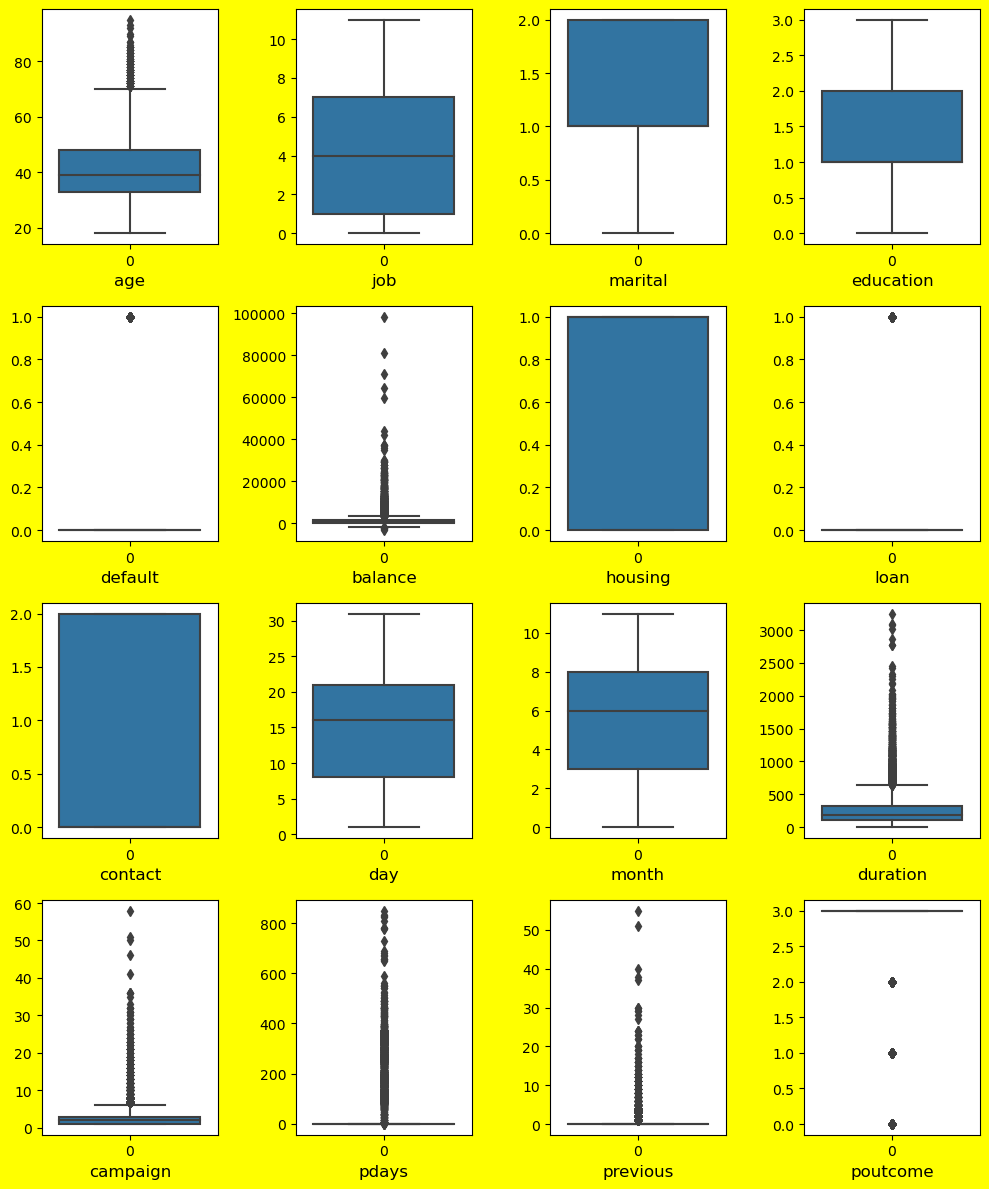

In [289]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,12), facecolor = 'yellow')
p = 1
for i in Bank_df_test:
    if p <= 16:
        ax = plt.subplot(4, 4, p)
        sns.boxplot(data = Bank_df_test[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

In [290]:
Bank_df_test.shape

(13564, 16)

In [291]:
x_test = Bank_df_test

In [292]:
x_test.shape

(13564, 16)

## Prediction using the saved model

In [293]:
loaded_model = pickle.load(open('Bank_Marketing_Model.pkl', 'rb'))

In [294]:
loaded_model

RandomForestClassifier()

In [295]:
prediction_saved_model = loaded_model.predict(x_test)
prediction_saved_model

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [296]:
df1_test = pd.DataFrame()
df1_test['subscribed'] = prediction_saved_model
df1_test

,subscribed
0,0
1,0
2,0
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,0


In [297]:
# Concat Feature and predicted output (i.e. subscribed)

Feature_Output = pd.concat([x_test, df1_test], axis = 1)

In [298]:
Feature_Output.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3,0
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3,0


In [299]:
Feature_Output

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3,0
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3,0
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3,0
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3,0
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3,0
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3,0
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3,0
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2,0


In [300]:
csv = Feature_Output.to_csv('Result_Bank_Marketing_Test.csv', index = False) 

Observation:
            1. This Bank_Marketing_Model.pkl can be used to classify whether the client subscribed 
                a term deposit or not.
            2. Term Deposit not subscribed represents '0' and Term Deposit subscribed represents '1'